In [ ]:
library(pastecs)
library(ggplot2)
library(ggpubr)
library(Hmisc)
library(ggpubr)
library(corrplot)
library(plyr)
library(multcomp)
library(afex)
library(tidyr)
library(ggsignif)
library(ltm)
# library(tidyverse)
library(rms)
library(wesanderson) # color package
library(psych) #EFA
library(lavaan)
library(semPlot)
library(semTools)
library(dplyr)
library(knitr)
library(MVN)
library(lavaanPlot)
library ( semTable )
# library(corrgram)
# library(tidyverse)
library(ggpubr)
library(rstatix)
library(broom)
library(multcomp)
library(xtable)  
par(bg = "#f7f7f7")

In [94]:
## read  csv
cds_df = read.csv('./Condition_csv/allCondition.csv')
llm_df = read.csv('./Condition_csv/llm_data.csv')
label_df = read.csv('./Condition_csv/labels_data.csv')

In [13]:
table(cds_df$condition)


Explanation    Hashtags       Label     noLabel 
         60          60          60          60 

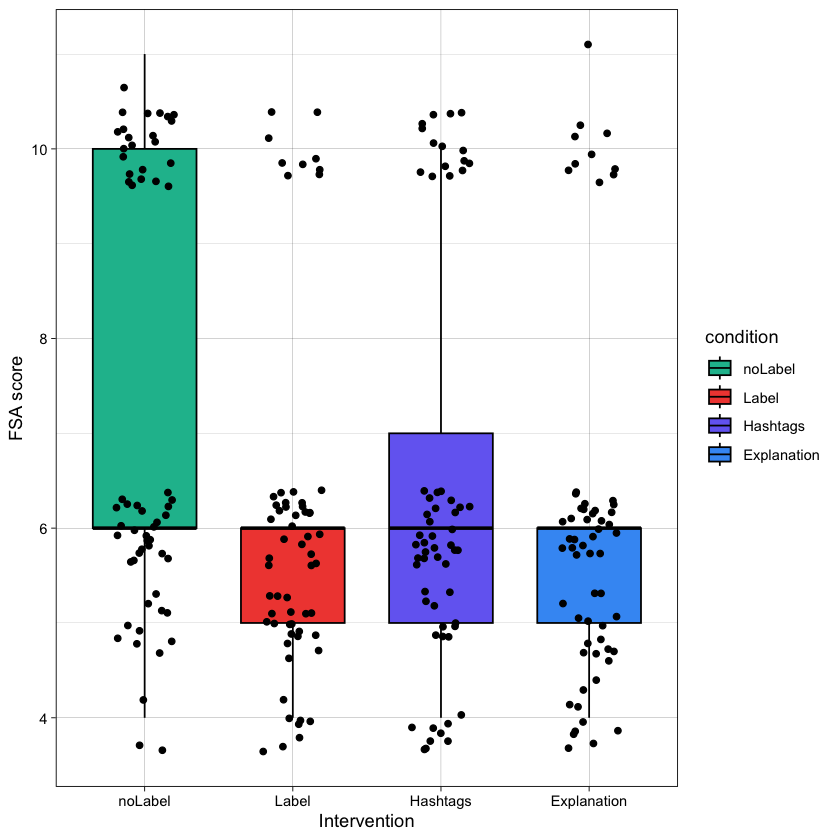

In [45]:
ggboxplot(cds_df, x = "condition", y = "fsa_score", fill = "condition",
           palette = c("#1ABC9C","#F14B3F", "#756DF2", "#419af4" ),
          order = c("noLabel", "Label", "Hashtags", "Explanation"),
          ylab = "FSA score", xlab = "Intervention", add = "jitter") + theme_linedraw()  
ggsave("./fig/fsalabels_all.pdf",  width=8, height=5,dpi=700)

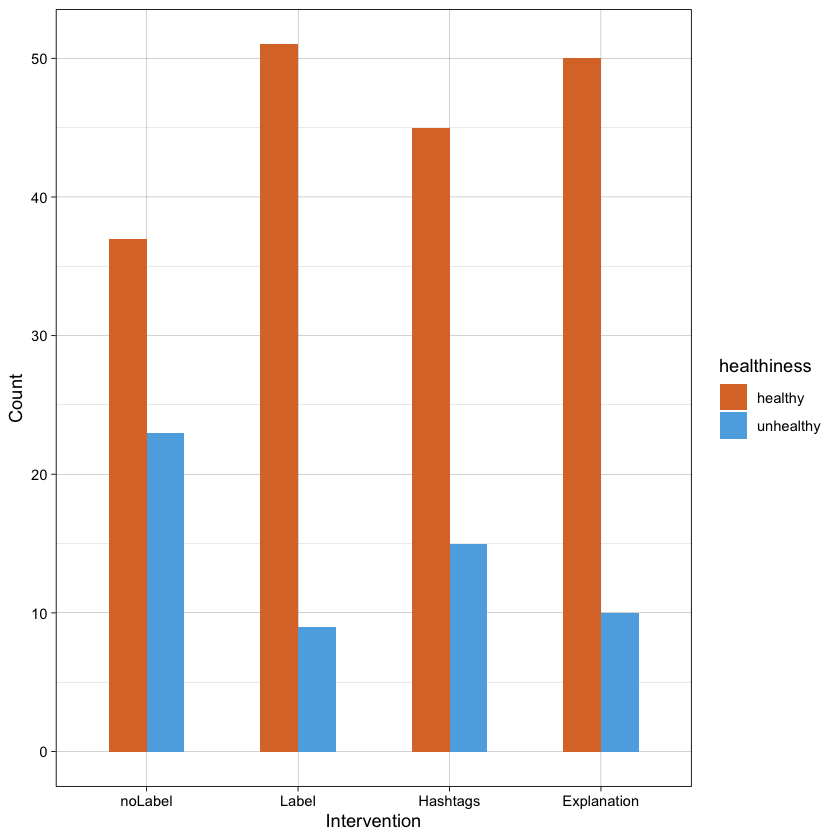

In [119]:
cds_df$condition <- factor(cds_df$condition, levels =  c("noLabel", "Label", "Hashtags", "Explanation"))
choice_dist_polot  = ggplot(data = cds_df, aes(x=condition, group = healthiness, fill=healthiness), ) + geom_bar(width=0.5,position = position_dodge(width=0.5)) + labs(x="Intervention", y='Count') + scale_fill_manual(values = c( "#DC7633","#5DADE2"))+theme_linedraw()  
choice_dist_polot
ggsave("./fig/condition_dist.pdf",  width=8, height=5,dpi=700)

In [52]:
# Compute mean and std for each group
mean_by_group <- tapply(cds_df$fsa_score, cds_df$condition, mean)
std_by_group <- tapply(cds_df$fsa_score, cds_df$condition, sd)


# Print results
print(mean_by_group)
print(std_by_group)

    noLabel       Label    Hashtags Explanation 
   7.283333    6.033333    6.533333    6.116667 
    noLabel       Label    Hashtags Explanation 
   2.255627    1.813010    2.134992    1.940572 


### ANOVA across all

In [64]:
## compute the mean difference across condition
Fsa_mean.model <- fsa_score ~ condition 
Fsa_mean.fit <- lm(Fsa_mean.model, data = cds_df)
summary <- summary(Fsa_mean.fit)
summary


Call:
lm(formula = Fsa_mean.model, data = cds_df)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.2833 -1.2833 -0.5333 -0.0333  4.8833 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)            7.2833     0.2638  27.612  < 2e-16 ***
conditionLabel        -1.2500     0.3730  -3.351 0.000938 ***
conditionHashtags     -0.7500     0.3730  -2.011 0.045514 *  
conditionExplanation  -1.1667     0.3730  -3.127 0.001985 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.043 on 236 degrees of freedom
Multiple R-squared:  0.05627,	Adjusted R-squared:  0.04428 
F-statistic: 4.691 on 3 and 236 DF,  p-value: 0.003346


In [79]:
## introducing Dummies variables
# Create dummy variables for the 'condition' variable
df_dummies  = cds_df

# Create dummy variables for the 'Color' column
dummies <- model.matrix(~ condition - 1, data = df_dummies)

# Combine the dummy variables with the original dataset (optional)
df_dummies <- cbind(df_dummies, dummies)

,person,age,country,education,gender,FK_9,FK_10,FK_11,FK_12,sus_1,⋯,condition,n_condition,satisfaction,persuasiveness,llm_hashtag,llm_explanation,conditionnoLabel,conditionLabel,conditionHashtags,conditionExplanation
,<int>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,⋯,<fct>,<int>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
1,1003,b25_35,GB,BA,Male,4,4,4,2,5,⋯,noLabel,0,NA,NA,,,1,0,0,0
2,1006,b35_45,GB,High_school,Female,4,4,4,2,5,⋯,noLabel,0,NA,NA,,,1,0,0,0
3,1008,b25_35,GB,MSc,Male,5,4,4,1,4,⋯,noLabel,0,NA,NA,,,1,0,0,0
4,1011,b25_35,GB,BA,Female,3,4,3,2,4,⋯,noLabel,0,NA,NA,,,1,0,0,0
5,1009,b25_35,GB,BA,Male,5,5,5,1,3,⋯,noLabel,0,NA,NA,,,1,0,0,0
6,1012,b35_45,GB,MSc,Female,4,4,4,2,4,⋯,noLabel,0,NA,NA,,,1,0,0,0


#### Fsa with dummies

In [92]:
Fsa_mean_dummies.model <- fsa_score ~ conditionHashtags+conditionExplanation +conditionLabel+conditionnoLabel
Fsa_mean.fit <- lm(Fsa_mean_dummies.model, data = df_dummies)
summary <- summary(Fsa_mean.fit)
print(summary)


Call:
lm(formula = Fsa_mean_dummies.model, data = df_dummies)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.2833 -1.2833 -0.5333 -0.0333  4.8833 

Coefficients: (1 not defined because of singularities)
                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)            7.2833     0.2638  27.612  < 2e-16 ***
conditionHashtags     -0.7500     0.3730  -2.011 0.045514 *  
conditionExplanation  -1.1667     0.3730  -3.127 0.001985 ** 
conditionLabel        -1.2500     0.3730  -3.351 0.000938 ***
conditionnoLabel           NA         NA      NA       NA    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.043 on 236 degrees of freedom
Multiple R-squared:  0.05627,	Adjusted R-squared:  0.04428 
F-statistic: 4.691 on 3 and 236 DF,  p-value: 0.003346



In [87]:
## Anova test 
anova_FSA= aov(fsa_score  ~ conditionLabel+conditionExplanation+conditionHashtags+conditionnoLabel, data = df_dummies)
summary(anova_FSA)

                      Df Sum Sq Mean Sq F value Pr(>F)  
conditionLabel         1   16.8  16.806   4.026 0.0460 *
conditionExplanation   1   25.1  25.069   6.005 0.0150 *
conditionHashtags      1   16.9  16.875   4.042 0.0455 *
Residuals            236  985.2   4.175                 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

In [61]:
Labels_fsa_posthoc <- TukeyHSD(anova_result,  conf.level = 0.95)
Labels_fsa_posthoc

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = Fsa_mean.model, data = cds_df)

$condition
                            diff        lwr        upr     p adj
Label-noLabel        -1.25000000 -2.2152091 -0.2847909 0.0051574
Hashtags-noLabel     -0.75000000 -1.7152091  0.2152091 0.1869986
Explanation-noLabel  -1.16666667 -2.1318757 -0.2014576 0.0106276
Hashtags-Label        0.50000000 -0.4652091  1.4652091 0.5381917
Explanation-Label     0.08333333 -0.8818757  1.0485424 0.9960585
Explanation-Hashtags -0.41666667 -1.3818757  0.5485424 0.6794491


In [128]:
fsa_posthocDF = as.data.frame(Labels_fsa_posthoc$condition)
fsa_posthocDF$pair = rownames(fsa_posthocDF)
# rec= as.data.frame(CD_posthoc$PE)
# all = rbind(CD_posthocDF,rec)
# all$pair = rownames(all)

Saving 7 x 7 in image


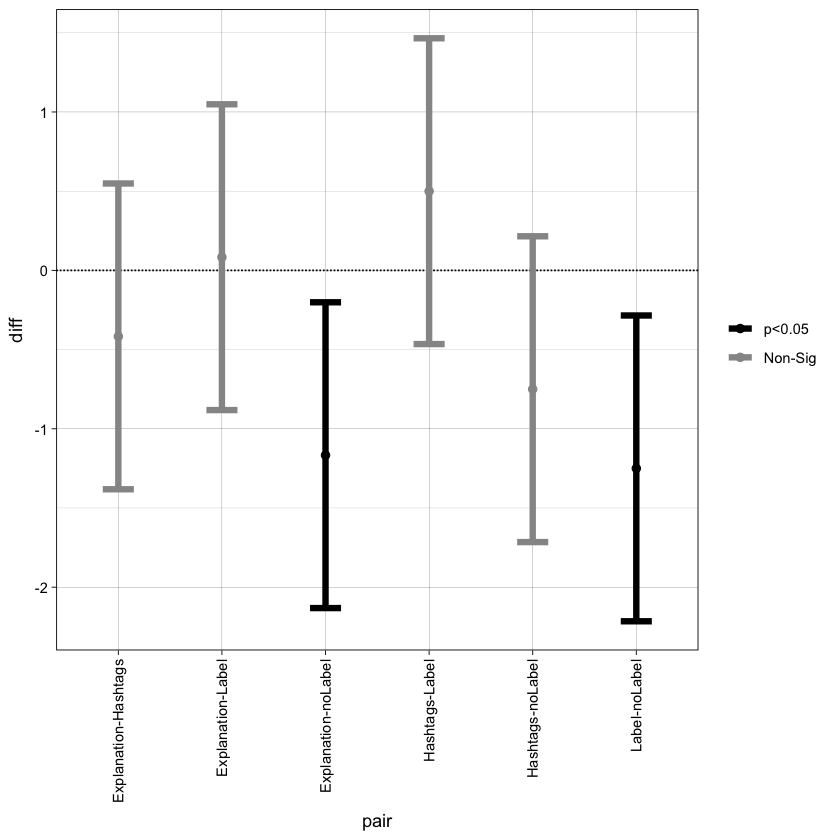

In [133]:

ggplot(fsa_posthocDF, aes( colour=cut(`p adj`, c(0, 0.03, 0.05, 1), 
                           label=c("p<0.05","p<0.05","Non-Sig")))) +
  geom_hline(yintercept=0, lty="11", colour="black") +
  geom_errorbar(aes(pair, ymin=lwr, ymax=upr), width=0.3, size=1.8) +
  geom_point(aes(pair, diff), size=2) +
  labs(colour="") +theme_linedraw()+theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1)) +  scale_color_manual(values = c("black", "grey59"))
  ggsave("./fig/CD_HSD.pdf", dpi=300)

### ANOVA Across labels

In [97]:


# Create dummy variables for the 'Color' column
dummies <- model.matrix(~ condition - 1, data = label_df)

# Combine the dummy variables with the original dataset (optional)
label_dummies <- cbind(label_df, dummies)

In [100]:
Fsa_labe_dummies.model <- fsa_score ~ conditionLabel+ conditionnoLabel 
Fsa_mean.fit <- lm(Fsa_labe_dummies.model, data = label_dummies)
summary <- summary(Fsa_mean.fit)
print(summary)


Call:
lm(formula = Fsa_labe_dummies.model, data = label_dummies)

Residuals:
   Min     1Q Median     3Q    Max 
-3.283 -1.283 -1.033  2.717  3.967 

Coefficients: (1 not defined because of singularities)
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)        7.2833     0.2642  27.570   <2e-16 ***
conditionLabel    -1.2500     0.3736  -3.346   0.0011 ** 
conditionnoLabel       NA         NA      NA       NA    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.046 on 118 degrees of freedom
Multiple R-squared:  0.08665,	Adjusted R-squared:  0.07891 
F-statistic: 11.19 on 1 and 118 DF,  p-value: 0.001101



In [103]:
## Anova test 
anova_label_FSA= aov(Fsa_labe_dummies.model, data = label_dummies)
summary(anova_label_FSA)

                Df Sum Sq Mean Sq F value Pr(>F)   
conditionLabel   1   46.9   46.88   11.19 0.0011 **
Residuals      118  494.1    4.19                  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

### ANOVA Across llms

In [114]:


# Create dummy variables for the 'Color' column
dummies <- model.matrix(~ condition - 1, data = llm_df)

# Combine the dummy variables with the original dataset (optional)
llm_dummies <- cbind(llm_df, dummies)

In [115]:
Fsa_llm_dummies.model <- fsa_score ~ conditionExplanation+conditionHashtags
Fsa_mean.fit <- lm(Fsa_llm_dummies.model, data = llm_dummies)
summary <- summary(Fsa_mean.fit)
print(summary)


Call:
lm(formula = Fsa_llm_dummies.model, data = llm_dummies)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.5333 -1.1167 -0.5333 -0.1167  4.8833 

Coefficients: (1 not defined because of singularities)
                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)            6.5333     0.2634  24.806   <2e-16 ***
conditionExplanation  -0.4167     0.3725  -1.119    0.266    
conditionHashtags          NA         NA      NA       NA    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.04 on 118 degrees of freedom
Multiple R-squared:  0.01049,	Adjusted R-squared:  0.002108 
F-statistic: 1.251 on 1 and 118 DF,  p-value: 0.2656



In [117]:
## Anova test 
anova_label_FSA= aov(Fsa_llm_dummies.model, data = llm_dummies)
summary(anova_label_FSA)

                      Df Sum Sq Mean Sq F value Pr(>F)
conditionExplanation   1    5.2   5.208   1.251  0.266
Residuals            118  491.1   4.162               

## Confirmatory Factor Analysis

In [317]:
cfa_df = read.csv('./cnd_csv/cfa_DF.csv')

### Food Knowledge



In [165]:
SFD.model <- 'SubjectiveFoodKnowledge =~ FK_9 + FK_10 + FK_11 + FK_12' 
SFD.fit <- cfa(SFD.model, data = cfa_df, mimic=c('Mplus'), std.lv = TRUE, ordered = TRUE)
print(summary(SFD.fit, fit.measures = T, standardized=T))

lavaan 0.6.13 ended normally after 12 iterations

  Estimator                                       DWLS
  Optimization method                           NLMINB
  Number of model parameters                        20

  Number of observations                           240

Model Test User Model:
                                              Standard      Scaled
  Test Statistic                                 0.522       1.085
  Degrees of freedom                                 2           2
  P-value (Chi-square)                           0.770       0.581
  Scaling correction factor                                  0.541
  Shift parameter                                            0.120
    simple second-order correction (WLSMV)                        

Model Test Baseline Model:

  Test statistic                              1683.829    1302.496
  Degrees of freedom                                 6           6
  P-value                                        0.000       0.000
  Scal

In [166]:
parameterEstimates(SFD.fit, standardized=TRUE) %>%
filter(op == "=~") %>%
select('Latent Factor'=lhs, Indicator=rhs, B=est, SE=se, Z=z, 'p-value'=pvalue, Beta=std.all) %>%
knitr::kable(digits = 3, booktabs=TRUE, format="markdown", caption="Factor Loadings")



Table: Factor Loadings

|Latent Factor           |Indicator |     B|    SE|      Z| p-value|  Beta|
|:-----------------------|:---------|-----:|-----:|------:|-------:|-----:|
|SubjectiveFoodKnowledge |FK_9      | 0.797| 0.028| 28.192|       0| 0.797|
|SubjectiveFoodKnowledge |FK_10     | 0.784| 0.029| 27.424|       0| 0.784|
|SubjectiveFoodKnowledge |FK_11     | 0.812| 0.032| 25.697|       0| 0.812|
|SubjectiveFoodKnowledge |FK_12     | 0.804| 0.033| 24.301|       0| 0.804|

pdf 
  2

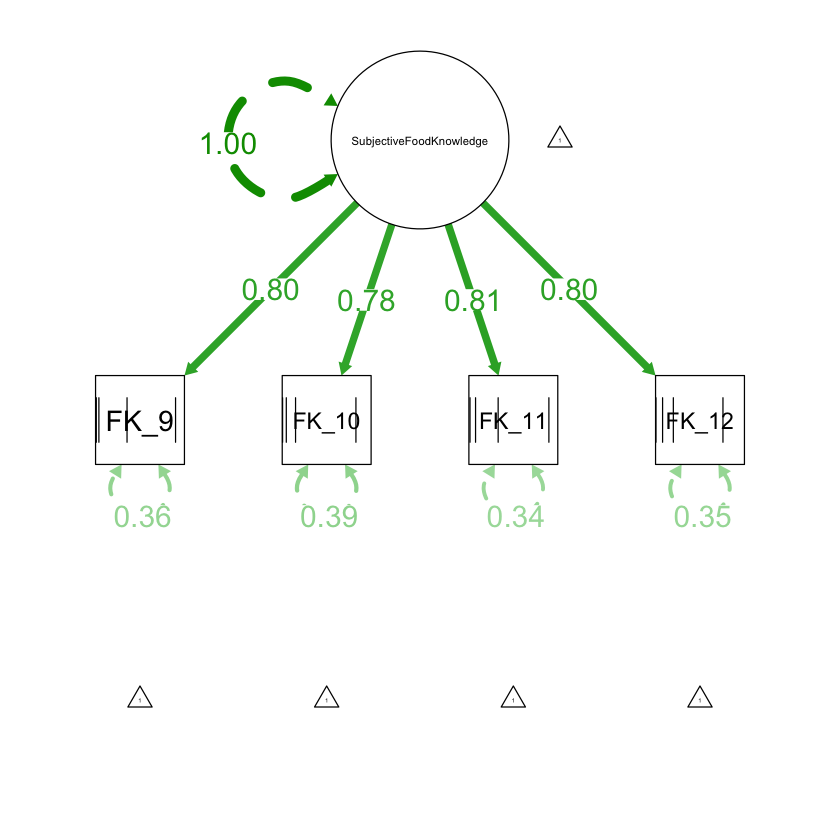

In [167]:
semPaths(SFD.fit, what = "std", residuals = TRUE, nCharNodes = 0, 
 sizeMan = 10, sizeLat = 20,
   edge.label.cex = 1.5, legend = FALSE)
# ggsave("./Fig/CFA_KB.png", dpi=300)
dev.print(pdf, './fig/sfd_fca.pdf')

In [168]:
### Cronbach Alpha
SFD = cfa_df[, c('FK_9','FK_10','FK_11','FK_12')]
sfd_alpha=cronbach.alpha(SFD)
sfd_alpha


Cronbach's alpha for the 'SFD' data-set

Items: 4
Sample units: 240
alpha: 0.812


In [169]:
# Calculate average inter-item correlation
avg_r <- sfd_alpha$alpha * (1 + (4 - 1)) / (4 - 1)

# Approximate AVE
ave <- (sfd_alpha$alpha * avg_r) / (sfd_alpha$alpha * avg_r + (1 - sfd_alpha$alpha))
ave

[1] 0.8241826

In [170]:
AVE(SFD.fit, obs.var = FALSE)

SubjectiveFoodKnowledge 
                  0.639

### Sustainabilty


In [184]:
SUS.model <- 'SustainabilityKnowledge =~ sus_1 + sus_2 + sus_3' # + sus_4' 
SUS.fit <- cfa(SUS.model, data = cfa_df, mimic=c('Mplus'), std.lv = TRUE, ordered = TRUE)
print(summary(SUS.fit, fit.measures = T, standardized=T))

lavaan 0.6.13 ended normally after 1 iteration

  Estimator                                       DWLS
  Optimization method                           NLMINB
  Number of model parameters                        15

  Number of observations                           240

Model Test User Model:
                                              Standard      Scaled
  Test Statistic                                 0.000       0.000
  Degrees of freedom                                 0           0

Model Test Baseline Model:

  Test statistic                               147.631     132.520
  Degrees of freedom                                 3           3
  P-value                                        0.000       0.000
  Scaling correction factor                                  1.117

User Model versus Baseline Model:

  Comparative Fit Index (CFI)                    1.000       1.000
  Tucker-Lewis Index (TLI)                       1.000       1.000
                                       

In [185]:
parameterEstimates(SUS.fit, standardized=TRUE) %>%
filter(op == "=~") %>%
select('Latent Factor'=lhs, Indicator=rhs, B=est, SE=se, Z=z, 'p-value'=pvalue, Beta=std.all) %>%
knitr::kable(digits = 3, booktabs=TRUE, format="markdown", caption="Factor Loadings")



Table: Factor Loadings

|Latent Factor           |Indicator |     B|    SE|      Z| p-value|  Beta|
|:-----------------------|:---------|-----:|-----:|------:|-------:|-----:|
|SustainabilityKnowledge |sus_1     | 0.663| 0.069|  9.589|       0| 0.663|
|SustainabilityKnowledge |sus_2     | 0.544| 0.071|  7.645|       0| 0.544|
|SustainabilityKnowledge |sus_3     | 0.740| 0.073| 10.129|       0| 0.740|

pdf 
  2

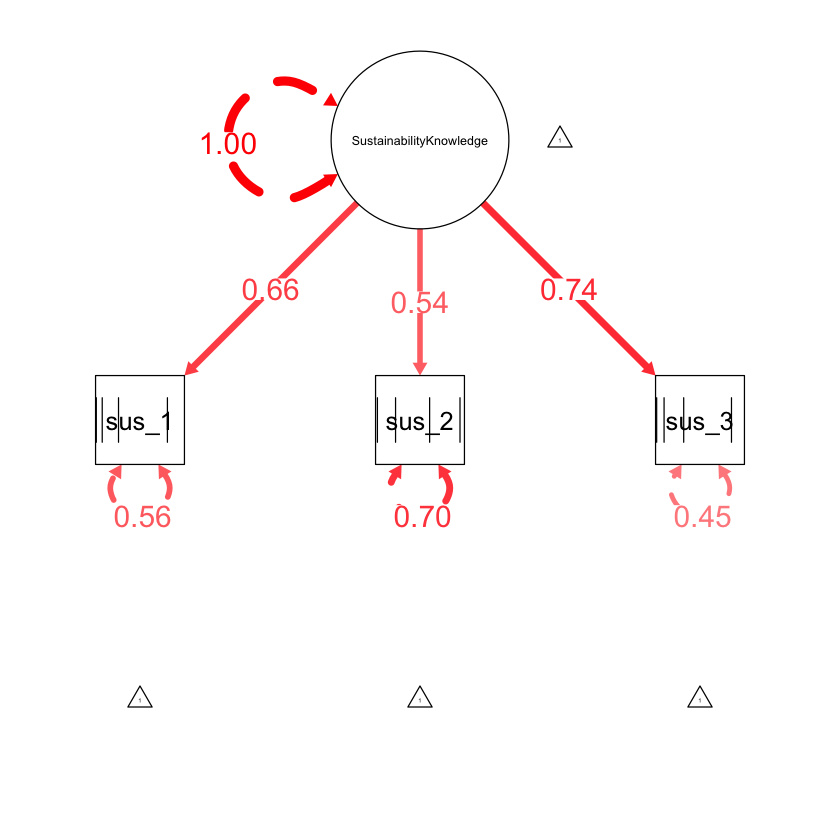

In [199]:
semPaths(SUS.fit, what = "std", residuals = TRUE, nCharNodes = 0, 
 sizeMan = 10, sizeLat = 20,
   edge.label.cex = 1.5, legend = FALSE,posCol = c("red"))
# ggsave("./Fig/CFA_KB.png", dpi=300)
dev.print(pdf, './fig/SUS_fca.pdf')

In [187]:
### Cronbach Alpha
SUS = cfa_df[, c('sus_1','sus_2','sus_3')]
sus_alpha=cronbach.alpha(SUS)
sus_alpha


Cronbach's alpha for the 'SUS' data-set

Items: 3
Sample units: 240
alpha: 0.617


In [188]:
AVE(SUS.fit, obs.var = FALSE)

SustainabilityKnowledge 
                  0.428

### Choice Satisfaction

In [189]:
ch_satis.model <- 'ChoiceSatisfaction =~ liked_recipes+prepare_recipes+fit_preference+recommend_recipe' 
ch_satis.model.fit <- cfa(ch_satis.model, data = cfa_df, mimic=c('Mplus'), std.lv = TRUE, ordered = TRUE)
print(summary(ch_satis.model.fit, fit.measures = T, standardized=T))

lavaan 0.6.13 ended normally after 11 iterations

  Estimator                                       DWLS
  Optimization method                           NLMINB
  Number of model parameters                        20

  Number of observations                           240

Model Test User Model:
                                              Standard      Scaled
  Test Statistic                                 1.099       2.241
  Degrees of freedom                                 2           2
  P-value (Chi-square)                           0.577       0.326
  Scaling correction factor                                  0.493
  Shift parameter                                            0.014
    simple second-order correction (WLSMV)                        

Model Test Baseline Model:

  Test statistic                              1870.390    1499.661
  Degrees of freedom                                 6           6
  P-value                                        0.000       0.000
  Scal

In [191]:
parameterEstimates(ch_satis.model.fit , standardized=TRUE) %>%
filter(op == "=~") %>%
select('Latent Factor'=lhs, Indicator=rhs, B=est, SE=se, Z=z, 'p-value'=pvalue, Beta=std.all) %>%
knitr::kable(digits = 3, booktabs=TRUE, format="markdown", caption="Factor Loadings")



Table: Factor Loadings

|Latent Factor      |Indicator        |     B|    SE|      Z| p-value|  Beta|
|:------------------|:----------------|-----:|-----:|------:|-------:|-----:|
|ChoiceSatisfaction |liked_recipes    | 0.908| 0.026| 34.615|       0| 0.908|
|ChoiceSatisfaction |prepare_recipes  | 0.856| 0.030| 28.649|       0| 0.856|
|ChoiceSatisfaction |fit_preference   | 0.800| 0.035| 22.977|       0| 0.800|
|ChoiceSatisfaction |recommend_recipe | 0.739| 0.037| 19.849|       0| 0.739|

pdf 
  2

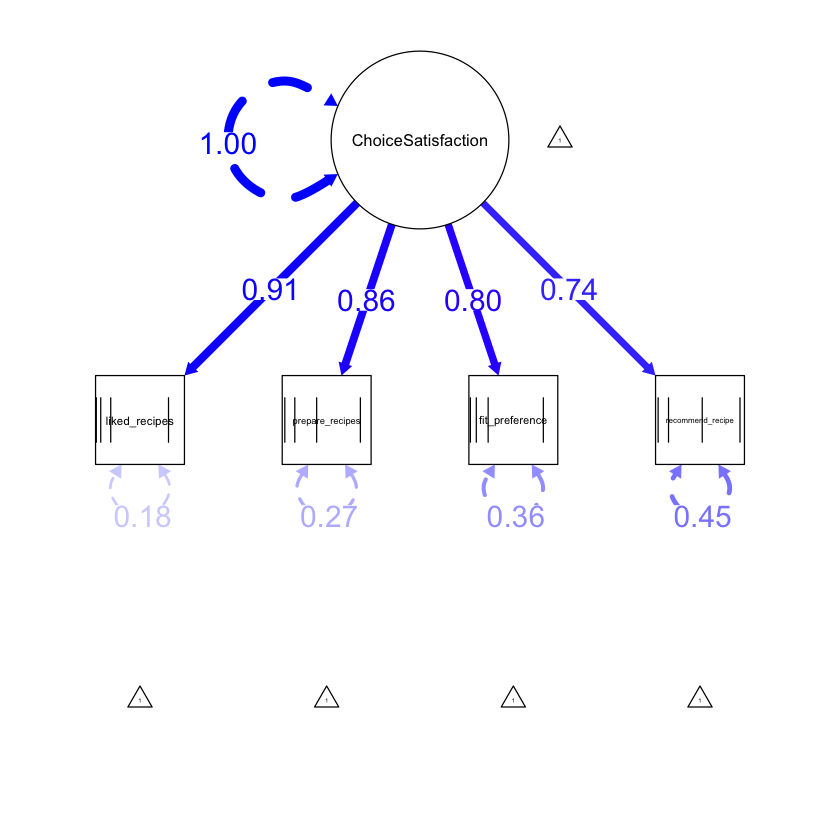

In [200]:
semPaths(ch_satis.model.fit, what = "std", residuals = TRUE, nCharNodes = 0, 
 sizeMan = 10, sizeLat = 20,
   edge.label.cex = 1.5, legend = FALSE,posCol = c("blue"))
# ggsave("./Fig/CFA_KB.png", dpi=300)
dev.print(pdf, './fig/ch_sat.pdf')

In [197]:
### Cronbach Alpha
choi_sats = cfa_df[, c('liked_recipes','prepare_recipes','fit_preference','recommend_recipe')]
choi_sats=cronbach.alpha(choi_sats)
choi_sats


Cronbach's alpha for the 'choi_sats' data-set

Items: 4
Sample units: 240
alpha: 0.854


In [198]:
AVE(ch_satis.model.fit, obs.var = FALSE)

ChoiceSatisfaction 
             0.686

### Choice difficulty

In [201]:
ch_diff.model <- 'ChoiceDifficulty =~  many_to_choose+ easy_choice+choice_overwhelming' 
ch_diff.model.fit <- cfa(ch_diff.model, data = cfa_df, mimic=c('Mplus'), std.lv = TRUE, ordered = TRUE)
print(summary(ch_diff.model.fit, fit.measures = T, standardized=T))

lavaan 0.6.13 ended normally after 1 iteration

  Estimator                                       DWLS
  Optimization method                           NLMINB
  Number of model parameters                        15

  Number of observations                           240

Model Test User Model:
                                              Standard      Scaled
  Test Statistic                                 0.000       0.000
  Degrees of freedom                                 0           0

Model Test Baseline Model:

  Test statistic                               666.116     576.468
  Degrees of freedom                                 3           3
  P-value                                        0.000       0.000
  Scaling correction factor                                  1.156

User Model versus Baseline Model:

  Comparative Fit Index (CFI)                    1.000       1.000
  Tucker-Lewis Index (TLI)                       1.000       1.000
                                       

In [202]:
parameterEstimates(ch_diff.model.fit , standardized=TRUE) %>%
filter(op == "=~") %>%
select('Latent Factor'=lhs, Indicator=rhs, B=est, SE=se, Z=z, 'p-value'=pvalue, Beta=std.all) %>%
knitr::kable(digits = 3, booktabs=TRUE, format="markdown", caption="Factor Loadings")



Table: Factor Loadings

|Latent Factor    |Indicator           |     B|    SE|      Z| p-value|  Beta|
|:----------------|:-------------------|-----:|-----:|------:|-------:|-----:|
|ChoiceDifficulty |many_to_choose      | 0.799| 0.054| 14.853|       0| 0.799|
|ChoiceDifficulty |easy_choice         | 0.898| 0.051| 17.697|       0| 0.898|
|ChoiceDifficulty |choice_overwhelming | 0.518| 0.044| 11.737|       0| 0.518|

pdf 
  2

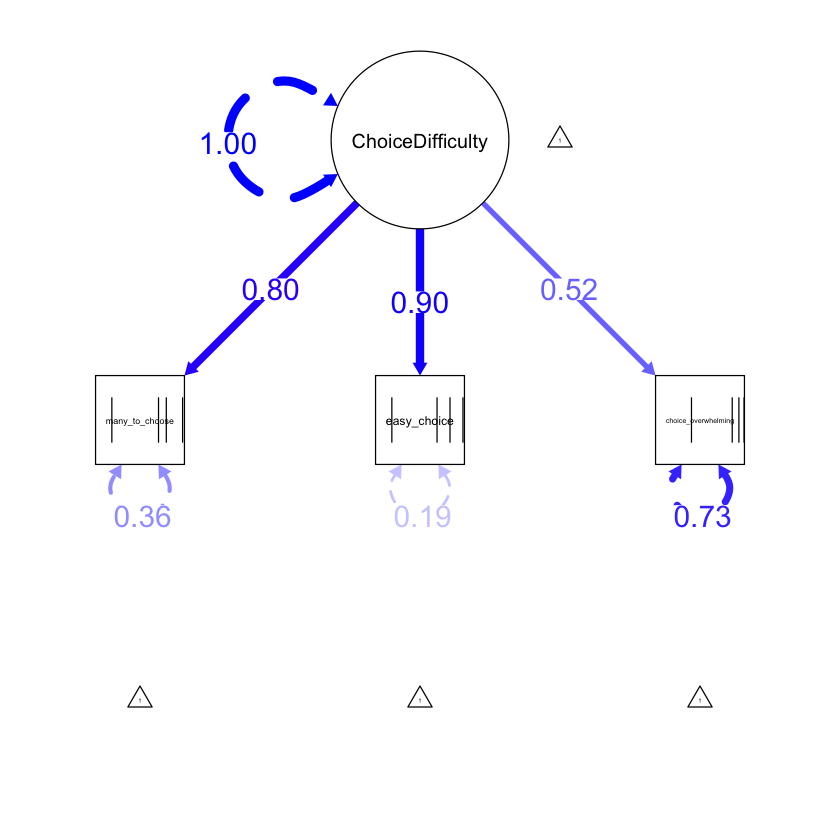

In [204]:
semPaths(ch_diff.model.fit, what = "std", residuals = TRUE, nCharNodes = 0, 
 sizeMan = 10, sizeLat = 20,
   edge.label.cex = 1.5, legend = FALSE,posCol = c("blue"))
# ggsave("./Fig/CFA_KB.png", dpi=300)
dev.print(pdf, './fig/ch_diff.pdf')

In [206]:
### Cronbach Alpha  
choi_diff = cfa_df[, c('many_to_choose','easy_choice','choice_overwhelming')]
choi_diff=cronbach.alpha(choi_diff)
choi_diff


Cronbach's alpha for the 'choi_diff' data-set

Items: 3
Sample units: 240
alpha: 0.728


In [207]:
AVE(ch_diff.model.fit, obs.var = FALSE)

ChoiceDifficulty 
           0.571

### Perceived Effort

In [288]:
perc_effort.model <- 'PerceivedEffort =~ unders_sys +sys_time+many_actions' 
perc_effort.model.fit <- cfa(perc_effort.model, data = cfa_df, mimic=c('Mplus'), std.lv = TRUE, ordered = TRUE)
print(summary(perc_effort.model.fit, fit.measures = T, standardized=T))

lavaan 0.6.13 ended normally after 1 iteration

  Estimator                                       DWLS
  Optimization method                           NLMINB
  Number of model parameters                        14

  Number of observations                           240

Model Test User Model:
                                              Standard      Scaled
  Test Statistic                                 0.000       0.000
  Degrees of freedom                                 0           0

Model Test Baseline Model:

  Test statistic                               217.952     202.787
  Degrees of freedom                                 3           3
  P-value                                        0.000       0.000
  Scaling correction factor                                  1.076

User Model versus Baseline Model:

  Comparative Fit Index (CFI)                    1.000       1.000
  Tucker-Lewis Index (TLI)                       1.000       1.000
                                       

In [289]:
parameterEstimates(perc_effort.model.fit , standardized=TRUE) %>%
filter(op == "=~") %>%
select('Latent Factor'=lhs, Indicator=rhs, B=est, SE=se, Z=z, 'p-value'=pvalue, Beta=std.all) %>%
knitr::kable(digits = 3, booktabs=TRUE, format="markdown", caption="Factor Loadings")



Table: Factor Loadings

|Latent Factor   |Indicator    |     B|    SE|      Z| p-value|  Beta|
|:---------------|:------------|-----:|-----:|------:|-------:|-----:|
|PerceivedEffort |unders_sys   | 0.632| 0.066|  9.622|       0| 0.632|
|PerceivedEffort |sys_time     | 0.866| 0.081| 10.738|       0| 0.866|
|PerceivedEffort |many_actions | 0.466| 0.065|  7.132|       0| 0.466|

pdf 
  2

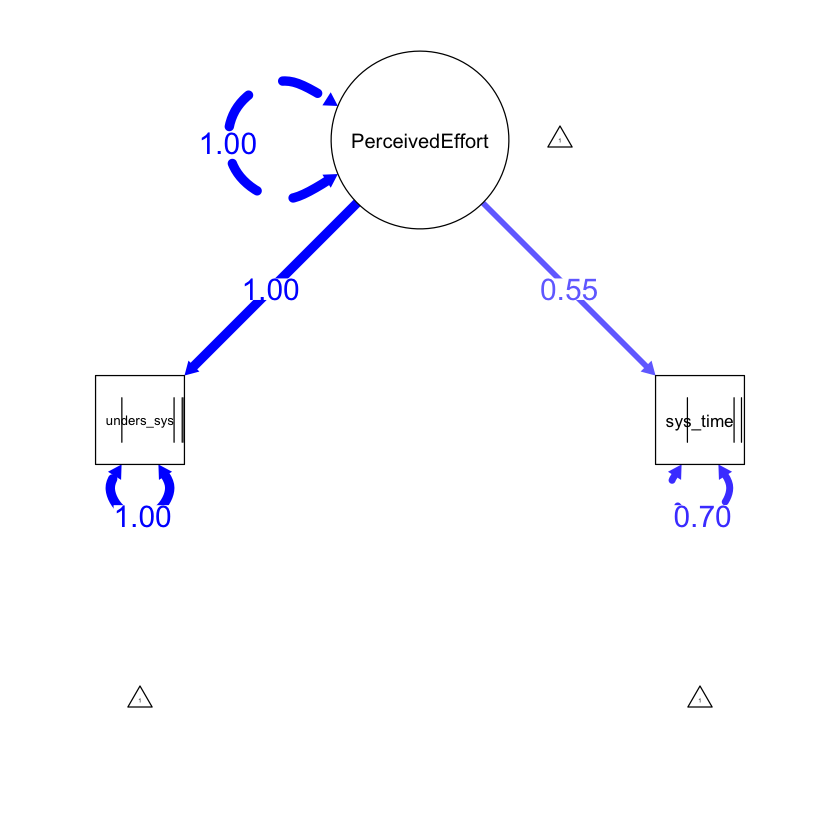

In [275]:
semPaths(perc_effort.model.fit, what = "std", residuals = TRUE, nCharNodes = 0, 
 sizeMan = 10, sizeLat = 20,
   edge.label.cex = 1.5, legend = FALSE,posCol = c("blue"))
# ggsave("./Fig/CFA_KB.png", dpi=300)
dev.print(pdf, './fig/perc_effort.pdf')

In [293]:
### Cronbach Alpha  
per_Efor_alph = cfa_df[, c('sys_time','unders_sys','many_actions')]
per_Efor_alph=cronbach.alpha(per_Efor_alph)
per_Efor_alph


Cronbach's alpha for the 'per_Efor_alph' data-set

Items: 3
Sample units: 240
alpha: 0.528


In [291]:
AVE(perc_effort.model.fit, obs.var = FALSE)

PerceivedEffort 
          0.455

### Understandability

In [318]:
understand.model <- 'Understand =~ under_1+under_2+under_3' 
understand.model.fit <- cfa(understand.model, data = cfa_df, mimic=c('Mplus'), std.lv = TRUE, ordered = TRUE)
print(summary(understand.model.fit, fit.measures = T, standardized=T))

lavaan 0.6.13 ended normally after 1 iteration

  Estimator                                       DWLS
  Optimization method                           NLMINB
  Number of model parameters                        15

  Number of observations                           240

Model Test User Model:
                                              Standard      Scaled
  Test Statistic                                 0.000       0.000
  Degrees of freedom                                 0           0

Model Test Baseline Model:

  Test statistic                               482.589     410.774
  Degrees of freedom                                 3           3
  P-value                                        0.000       0.000
  Scaling correction factor                                  1.176

User Model versus Baseline Model:

  Comparative Fit Index (CFI)                    1.000       1.000
  Tucker-Lewis Index (TLI)                       1.000       1.000
                                       

In [319]:
parameterEstimates(understand.model.fit  , standardized=TRUE) %>%
filter(op == "=~") %>%
select('Latent Factor'=lhs, Indicator=rhs, B=est, SE=se, Z=z, 'p-value'=pvalue, Beta=std.all) %>%
knitr::kable(digits = 3, booktabs=TRUE, format="markdown", caption="Factor Loadings")



Table: Factor Loadings

|Latent Factor |Indicator |     B|    SE|      Z| p-value|  Beta|
|:-------------|:---------|-----:|-----:|------:|-------:|-----:|
|Understand    |under_1   | 0.730| 0.040| 18.420|       0| 0.730|
|Understand    |under_2   | 0.702| 0.051| 13.760|       0| 0.702|
|Understand    |under_3   | 0.825| 0.039| 21.025|       0| 0.825|

pdf 
  2

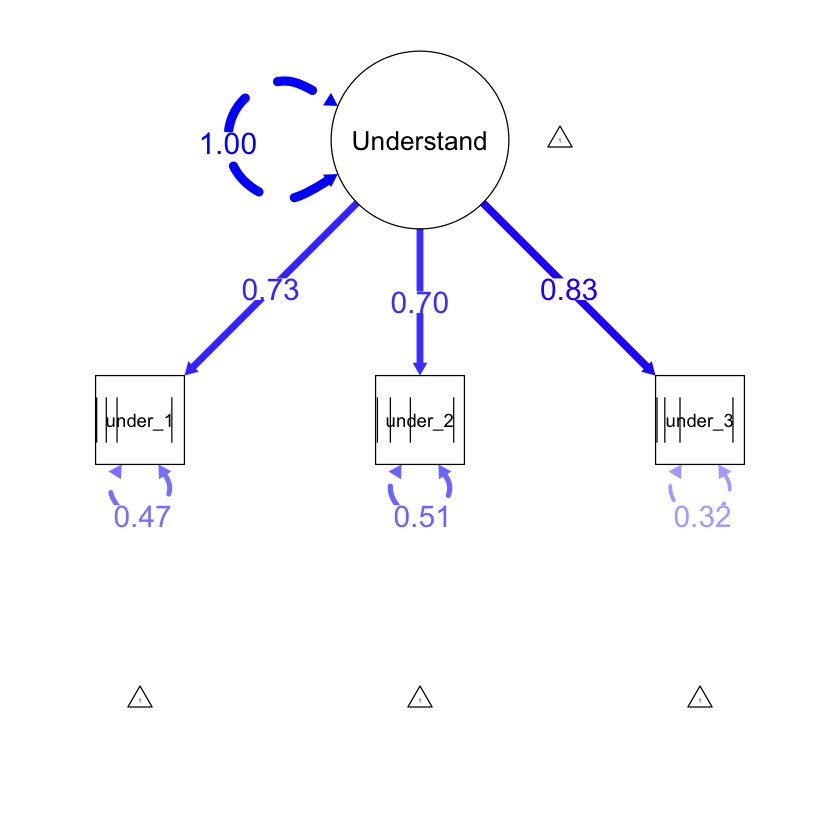

In [320]:
semPaths(understand.model.fit , what = "std", residuals = TRUE, nCharNodes = 0, 
 sizeMan = 10, sizeLat = 20,
   edge.label.cex = 1.5, legend = FALSE,posCol = c("blue"))
# ggsave("./Fig/CFA_KB.png", dpi=300)
dev.print(pdf, './fig/understandability.pdf')

In [321]:
### Cronbach Alpha  

understand_alph = cfa_df[, c('under_1', 'under_2','under_3')]
understand_alph=cronbach.alpha(understand_alph)
understand_alph


Cronbach's alpha for the 'understand_alph' data-set

Items: 3
Sample units: 240
alpha: 0.718


In [322]:
AVE(understand.model.fit, obs.var = FALSE)

Understand 
     0.569

### Usability

In [323]:
nudge_df = read.csv('./cnd_csv/nudge_df.csv')

In [328]:
Usability.model <- 'Usability =~use_1+use_2'
Usability.model.fit <- cfa(Usability.model, data = nudge_df, mimic=c('Mplus'), std.lv = TRUE, ordered = TRUE)
print(summary(Usability.model.fit, fit.measures = T, standardized=T))

Warning message in lav_model_vcov(lavmodel = lavmodel, lavsamplestats = lavsamplestats, :
“lavaan WARNING:
    Could not compute standard errors! The information matrix could
    not be inverted. This may be a symptom that the model is not
    identified.”


lavaan 0.6.13 ended normally after 1 iteration

  Estimator                                       DWLS
  Optimization method                           NLMINB
  Number of model parameters                        10

  Number of observations                           180

Model Test User Model:
                                                      
  Test statistic                                    NA
  Degrees of freedom                                -1
  P-value (Unknown)                                 NA

Standardized Root Mean Square Residual:

  SRMR                                           0.000

Parameter Estimates:

  Standard errors                           Robust.sem
  Information                                 Expected
  Information saturated (h1) model        Unstructured

Latent Variables:
                   Estimate  Std.Err  z-value  P(>|z|)   Std.lv  Std.all
  Usability =~                                                          
    use_1             1.000       NA 

In [ ]:
parameterEstimates(Usability.model.fit , standardized=TRUE) %>%
filter(op == "=~") %>%
select('Latent Factor'=lhs, Indicator=rhs, B=est, SE=se, Z=z, 'p-value'=pvalue, Beta=std.all) %>%
knitr::kable(digits = 3, booktabs=TRUE, format="markdown", caption="Factor Loadings")



Table: Factor Loadings

|Latent Factor |Indicator |     B| SE|  Z| p-value|  Beta|
|:-------------|:---------|-----:|--:|--:|-------:|-----:|
|Usability     |use_1     | 1.000| NA| NA|      NA| 1.000|
|Usability     |use_2     | 0.828| NA| NA|      NA| 0.828|

pdf 
  2

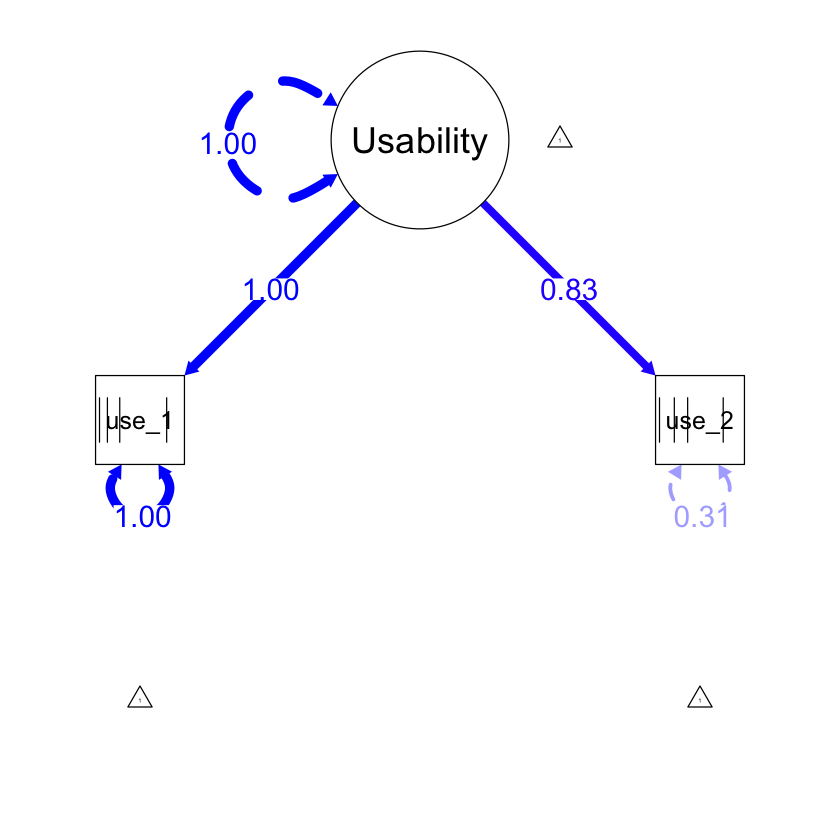

In [331]:
semPaths(Usability.model.fit , what = "std", residuals = TRUE, nCharNodes = 0, 
 sizeMan = 10, sizeLat = 20,
   edge.label.cex = 1.5, legend = FALSE,posCol = c("blue"))
# ggsave("./Fig/CFA_KB.png", dpi=300)
dev.print(pdf, './fig/understandability.pdf')

In [334]:
### Cronbach Alpha
SFD = nudge_df[, c('use_1','use_2')]
sfd_alpha=cronbach.alpha(SFD)
sfd_alpha


Cronbach's alpha for the 'SFD' data-set

Items: 2
Sample units: 180
alpha: 0.841


In [335]:
AVE(Usability.model.fit, obs.var = FALSE)

Usability 
    0.843